In [3]:
#name  : Diego Molina Ormazabal
#date  : january 2021
#mail  : diegmolina@udec.cl
#work  : Frictional Segmentation of the Chilean Megathrust from a Multivariate Analysis of
#        Geophysical, Geological and Geodetic Data.
"""
This script allows to extract the principal components (PCA) and orthogonal functions from different geophysical
fields. The script has different steps related to the data analysis and preparation to then be used in PCA. 
"""

'\nThis script allows to extract the principal components (PCA) and orthogonal functions from different geophysical\nfields. The script has different steps related to the data analysis and preparation to then be used in PCA. \n'

In [4]:
"""
preparation of the script and work path
"""
%load_ext autoreload
%autoreload 2
#importation of python tools and libraries to be used
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy as np
from scipy.io import netcdf_file as netcdf
import netCDF4
from scipy.ndimage import gaussian_filter
from scipy import stats
from shading import set_shade, hillshade
import subroutine as sub
from matplotlib.colors import LinearSegmentedColormap
from scipy import interpolate
import pandas as pd 
import plot_function_pca as pfp
import os

path_work = raw_input('Enter the path of your work directory:')
#defining path of data to work. (grids of geophysical fields and plots)
path_data = path_work+'/data_fields'
path_data_grids = path_work+'/data_grids'
path_fig_output = path_work+'/fig_outputs'
path_grd_output = path_work+'/grid_outputs'

#creating the folder to save the outputs
path_fig_output_folder = path_work+'/fig_outputs/'
print path_fig_output_folder
if os.path.isdir(path_fig_output_folder):
    print 'Directory already existes'
if os.path.isdir(path_fig_output_folder) == False:
    print 'Directory created'
    os.makedirs(path_fig_output_folder)
    
path_fig_output_folder = path_work+'/grid_outputs/'
print path_fig_output_folder
if os.path.isdir(path_fig_output_folder):
    print 'Directory already existes'
if os.path.isdir(path_fig_output_folder) == False:
    print 'Directory created'
    os.makedirs(path_fig_output_folder)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Enter the path of your work directory:/home/diego/Desktop/paper_function_rebutal/script y funcion
/home/diego/Desktop/paper_function_rebutal/script y funcion/fig_outputs/
Directory created
/home/diego/Desktop/paper_function_rebutal/script y funcion/grid_outputs/
Directory created


Step 1 == >> Loading fields, This can take a few seconds... 


/home/diego/.local/lib/python2.7/site-packages/scipy/io/netcdf.py:317: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


<IPython.core.display.Javascript object>


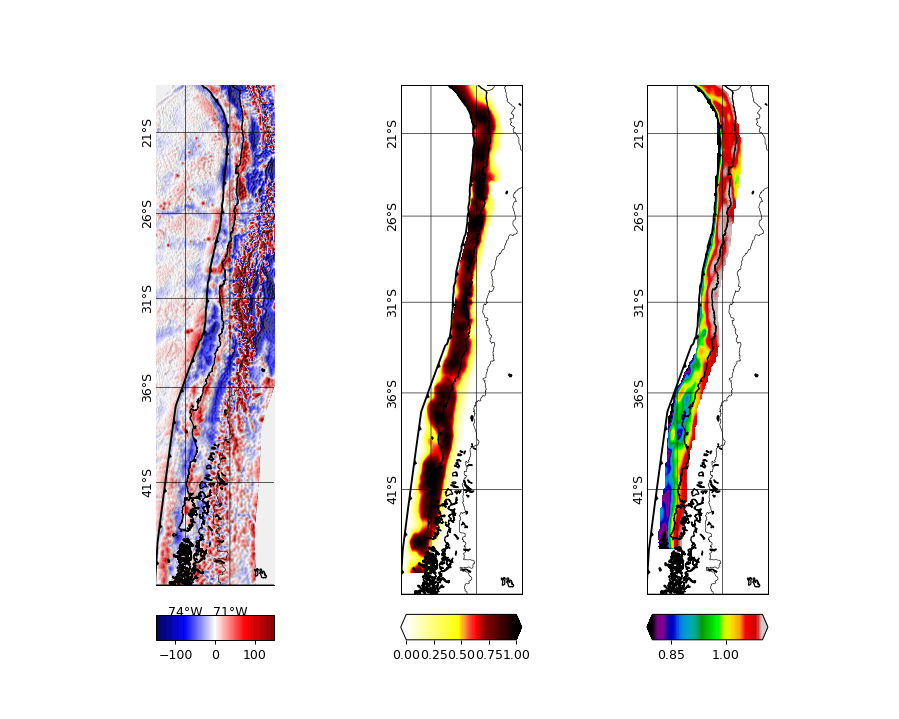

In [5]:
"""
Step 1 = Visualization of the geophysical fields
"""
print 'Step 1 == >> Loading fields, This can take a few seconds... '
#step 1. Display of the three fields to be analised by PCA

#1a) loading gravity field
gravity = np.loadtxt(path_data+'/grav_anom_PCA_10km_400.txt')
lon_g = gravity[:,0]; lat_g = gravity[:,1] ; grav_g = gravity[:,2] #>>extraction of lat,lon and grav_anomaly   
#reshape of the data to the grid original grid size of Bouger Gravity anomaly
grav_an    = np.reshape(grav_g,(3830,973))
lon_gr     = np.reshape(lon_g,(3830,973))
lat_gr     = np.reshape(lat_g,(3830,973))
lon_grd    = lon_gr[0] ;     lat_grd = lat_gr[:,0] 

#2a) loading locking field
#extraction lat lon lock
lock_c        = netcdf(path_data+'/locking_chile_june15.grd','r').variables['z'][::1]
lon_c         = netcdf(path_data+'/locking_chile_june15.grd','r').variables['x'][::1]
lat_c         = netcdf(path_data+'/locking_chile_june15.grd','r').variables['y'][::1]
#creation of the meshgrid to plot the data
lon_lk , lat_lk = np.meshgrid(lon_c,lat_c)


#3a) loading friction field
fh = netCDF4.Dataset(path_data+'/cw_fr_chile_080.grd')
#extraction lat lon friction
friction  = fh.variables['Band1'][:]
lon_f     = fh.variables['lon'][:]
lat_f     = fh.variables['lat'][:]
#creation of the meshgrid to plot the data
lon_fr , lat_fr = np.meshgrid(lon_f,lat_f)




#4a). Creation of the basemap definition to plot the data on map for gravity anomaly
%matplotlib notebook
figsize = (10, 8)
fig = plt.figure(11,figsize = figsize)
#loading data related to trench geometry
fosa = np.loadtxt(path_data_grids+'/Trench.xy')
fosa_lon = fosa[:,0]-360 ; fosa_lat = fosa[:,1]            #>> Latitud y longitud de los puntos de la fosa.
#needed to plot trench geometry
info_nzsa = fosa
x = info_nzsa.T[0]; y = info_nzsa.T[1]
x2 = x[0::12]; y2 = y[0::12]
dx = np.diff(x2); dy = np.diff(y2)
length = np.sqrt(dx**2 + dy**2)
dx /= length; dy /= length
#definition of map geographycal extension
latmin_map = -46     #<-Latitud  min (degrees) (South)
latmax_map = -18     #<-Latitud  max (degrees) (North)
lonmin_map = -76     #<-Longitud min (degrees) (West)
lonmax_map = -68     #<-Longitud max (degrees) (East)


########################################################################################################
########################################################################################################

#first subplot regarding gravity anomaly 
ax = fig.add_subplot(131)
map = Basemap(projection='merc', resolution="h", llcrnrlon=lonmin_map, llcrnrlat=latmin_map, 
              urcrnrlon=lonmax_map, urcrnrlat=latmax_map)                        
map.drawcoastlines(zorder=21,color = 'k')
map.drawcountries(zorder=21)
parallels = map.drawparallels(np.linspace(-16, -46,7), labels=[1, 0, 0, 0], fmt="%.0f", #4
                dashes=[2000, 2000], zorder=24,linewidth = 0.5)
for m in parallels:
    try:
        parallels[m][1][0].set_rotation(90)
    except:
        pass      
map.drawmeridians([-71,-74], labels=[0, 0, 0, 1], fmt="%.0f",
               dashes=[5000, 5000],zorder=24,linewidth = 0.5)    


map.plot(x, y, color= 'k', linewidth=1.5, zorder=41, latlon=True, ax=ax, alpha=1,clip_on=True)
map.quiver(x2[0:20], y2[0:20], dy[0:20], -dx[0:20], latlon=True,headaxislength=8, headlength=8,headwidth=18, color= 'k', scale=40, zorder=41, ax=ax, alpha=1, clip_on=True)

maxi= 150
mini=-150
blevels_top =np.linspace(mini,maxi,100)  
mx = int((map.xmax-map.xmin)/1000.)+1; my = int((map.ymax-map.ymin)/1000.)+1


anom_dat = map.transform_scalar(grav_an,lon_grd,lat_grd,mx,my, masked=True)
intensity = hillshade(anom_dat,scale=1,azdeg=290.0,altdeg=45.0)

bt1 = map.imshow(intensity, cmap='gray' ,zorder =19,alpha=1)
bt2 = map.imshow(anom_dat,vmin= mini,vmax= maxi, cmap=plt.cm.seismic,zorder=20, alpha=0.7)
cbar= map.colorbar(bt2,ticks= [-100,100,0],location='bottom',pad="6%")

########################################################################################################
########################################################################################################

#second subplot regarding locking degree 
ax = fig.add_subplot(132)
map = Basemap(projection='merc', resolution="h", llcrnrlon=lonmin_map, llcrnrlat=latmin_map, 
              urcrnrlon=lonmax_map, urcrnrlat=latmax_map)                        
map.drawcoastlines(zorder=22,color = 'k')
map.drawcountries(zorder=22)
parallels = map.drawparallels(np.linspace(-16, -46,7), labels=[1, 0, 0, 0], fmt="%.0f", #4
                dashes=[2000, 2000], zorder=24,linewidth = 0.5)
for m in parallels:
    try:
        parallels[m][1][0].set_rotation(90)
    except:
        pass      
map.drawmeridians([-71,-74], labels=[0, 0, 0, 1], fmt="%.0f",
               dashes=[5000, 5000],zorder=24,linewidth = 0.5)    


map.plot(x, y, color= 'k', linewidth=1.5, zorder=41, latlon=True, ax=ax, alpha=1,clip_on=True)
map.quiver(x2[0:20], y2[0:20], dy[0:20], -dx[0:20], latlon=True,headaxislength=8, headlength=8,headwidth=18, color= 'k', scale=40, zorder=41, ax=ax, alpha=1, clip_on=True)

maxi= 1
mini= 0
blevels_top =np.linspace(mini,maxi,100)  

#creationg of color palete
mindem = 1000
rango  = 2500
mapu = LinearSegmentedColormap.from_list('mycmap', 
										[( 0., 'white'),
                                             ((200.+mindem)/rango, 'yellow'),
                                             ((400.+mindem)/rango,'tomato'),
									    ((600.+mindem)/rango,'red'),
										((800.+mindem)/rango, 'darkred'),                                 										 
										(1., 'k')])





paleta   = mapu

im=map.contourf(lon_lk,lat_lk,lock_c,vmin=mini,vmax=maxi,levels=blevels_top,cmap=paleta,extend='both',zorder=21,latlon = True)
cb = map.colorbar(im,ticks= [0,0.25,0.5,0.75,1],location='bottom',pad="4%") 

########################################################################################################
########################################################################################################
  
#third subplot regarding friction 
ax = fig.add_subplot(133)
map = Basemap(projection='merc', resolution="h", llcrnrlon=lonmin_map, llcrnrlat=latmin_map, 
              urcrnrlon=lonmax_map, urcrnrlat=latmax_map)                        
map.drawcoastlines(zorder=21,color = 'k')
map.drawcountries(zorder=21)
parallels = map.drawparallels(np.linspace(-16, -46,7), labels=[1, 0, 0, 0], fmt="%.0f", #4
                dashes=[2000, 2000], zorder=24,linewidth = 0.5)
for m in parallels:
    try:
        parallels[m][1][0].set_rotation(90)
    except:
        pass      
map.drawmeridians([-71,-74], labels=[0, 0, 0, 1], fmt="%.0f",
               dashes=[5000, 5000],zorder=24,linewidth = 0.5)    


map.plot(x, y, color= 'k', linewidth=1.5, zorder=41, latlon=True, ax=ax, alpha=1,clip_on=True)
map.quiver(x2[0:20], y2[0:20], dy[0:20], -dx[0:20], latlon=True,headaxislength=8, headlength=8,headwidth=18, color= 'k', scale=40, zorder=41, ax=ax, alpha=1, clip_on=True)

maxi= 1.1
mini= 0.8
blevels_top =np.linspace(mini,maxi,100)  


im=map.contourf(lon_fr,lat_fr,friction,vmin=mini,vmax=maxi,levels=blevels_top,cmap=plt.cm.nipy_spectral,extend='both',zorder=20,latlon = True)
cb = map.colorbar(im,ticks= [0.85,0.051,1,0],location='bottom',pad="4%") 


plt.savefig(path_fig_output+'/data_fields.png',format = 'png', dpi = 300)

Enter number of perpendicular profiles (144 for this work) :144


/home/diego/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':
subroutine.py:603: RuntimeWarning: divide by zero encountered in double_scalars
  while ( abs( (last_sigma - sigma) / sigma) > 1.0e-9 ) :
subroutine.py:603: RuntimeWarning: invalid value encountered in double_scalars
  while ( abs( (last_sigma - sigma) / sigma) > 1.0e-9 ) :


The space between trench points is  20.524902445387763 kilometers
Enter perpendicular profile length (e.x,130 km [130000]) :150000


<IPython.core.display.Javascript object>


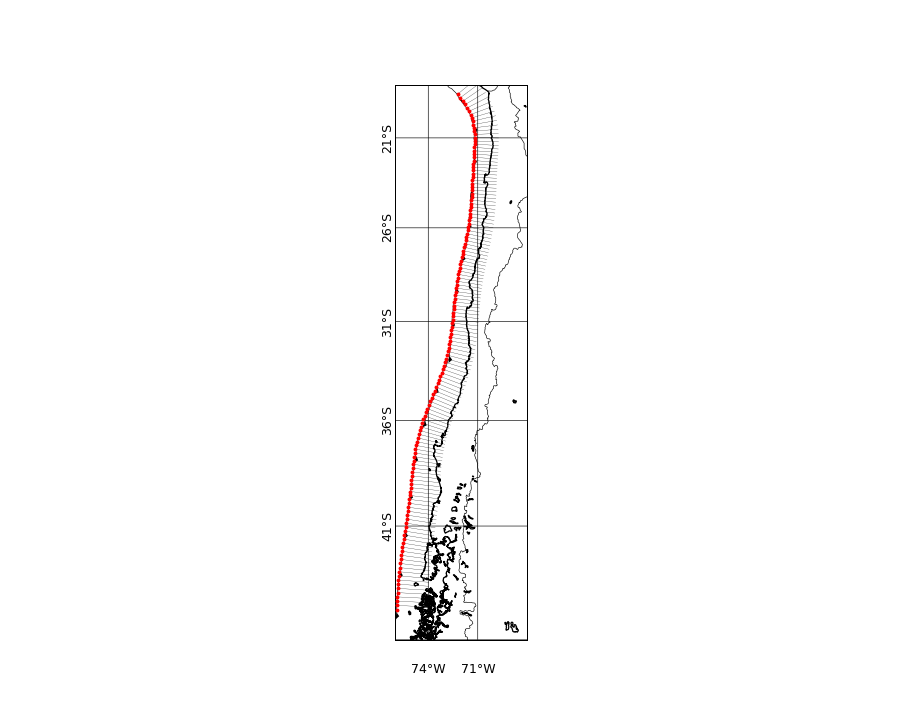

In [6]:
"""
Step 2 

Creation of the common grid where the field where be extrapolated. Here the trench perpendicular profiles are 
built. Here it is defined the along strike spacing of the profiles and their length.
"""
n = int(raw_input('Enter number of perpendicular profiles (144 for this work) :'))#>> number of points or perpendicular profiles
#2a) We obtain points from the trench homogenously spaced along strike
#interpolation and smoothing of the trench geometry for the chilean margin along strike
f = interpolate.interp1d(fosa_lat,fosa_lon,'linear')
flat = np.linspace(max(fosa_lat),min(fosa_lat),10000) ; flon = f(flat)
func = np.polyfit(flat,flon,30)
lon_fosa_smooth = np.polyval(func,flat)
lat_fosa_smooth = flat

#2b) We divide the trench profile, for that we use a script to divide the trench in equal spaced segments for
# which we obtain the central point on lat lon.

def grilla(latmin_map, latmax_map,lonmin_map,lonmax_map, lonf,latf,lon1,lat1):
    
    
#subduction zone
    zona_subduccion    = 'Chile'
#subduction direction 
    sentido_subduccion = 'WE'       #   EW  :  East-West  (Ej. Japon)
                                    #   WE  :  West-East  (Ej. Chile, Ecuador_Colombia) 
        
    fosa_lon = lon_fosa_smooth ; fosa_lat = lat_fosa_smooth 
    
#Numero de dimensiones referente a la cantidad de componentes de los registros 
   
    W                 = 0       #<-size fault, in this case not used.
    nx                = n    #<-NUMBER OF POINTS OF THE TRENCH PROFILE. (perpendicular profile number)
    ny                = 1       #<-number of elements in dip direction, 1 ==> just the trench line 
    delta_lat         = -0.08   #<-Inclination angle elements, no used

    dip_plano_inicial = np.radians(5.)  #<-Dip fault, no used
                             
    '''
    -------------------------------------------------------------------------------
    Function to obtain the main length (L) of trench and strike of chilean margin. Calculated using geodetic functions
    -------------------------------------------------------------------------------
    '''

    L, strike_aux_deg, backstrike = sub.vinc_dist(  latf,  lonf,  lat1,  lon1 )     


    if sentido_subduccion == 'EW':
        strike_rad = np.radians(strike_aux_deg+180)                                  #<-Strike 
    if sentido_subduccion == 'WE':
        strike_rad = np.radians(strike_aux_deg)                                      #<-Strike 

    strike = strike_rad
  
    '''
    -------------------------------------------------------------------------------
    estimation of central coordinates for trench segments equaly spaced along strike for Chilean margin
    -------------------------------------------------------------------------------
    '''

    if sentido_subduccion == 'EW':

        lat0_ini,  lon0_ini,  alpha21  = sub.vinc_pt( lat1, lon1, np.degrees(strike_rad+np.pi/2), W*np.cos(dip_plano_inicial) )  
        aux, aux, vertices_plano_inicial_lon, vertices_plano_inicial_lat =sub.coordenadas_subfallas_EW(ny,nx,dip_plano_inicial,W,L,lon0_ini,lat0_ini,strike_rad,fosa_lon,fosa_lat,delta_lat)
    if sentido_subduccion == 'WE':
   
        lat0_ini,  lon0_ini,  alpha21  = sub.vinc_pt( latf, lonf, np.degrees(strike_rad+np.pi/2), W*np.cos(dip_plano_inicial) )  
        lon_central_subfallas_slab, lat_central_subfallas_slab, vertices_plano_inicial_lon, vertices_plano_inicial_lat =sub.coordenadas_subfallas(ny,nx,dip_plano_inicial,W,L,lon0_ini,lat0_ini,strike_rad,fosa_lon,fosa_lat,delta_lat)

    return np.rad2deg(strike),L,lon_central_subfallas_slab, lat_central_subfallas_slab
    
#3b) definiton of the portion of the trench to be used, the southern and northern  limits are defined

lonf              = -73;  latf = -45        #<-southern limit trench 
lon1              = -71;  lat1 = -18.5      #<-northern limit trench 

#4b) Obtention of the middle points of the trench segments used to built the perpendicular profiles
   
St,L,lon_x, lat_x = grilla(latmin_map, latmax_map,lonmin_map,lonmax_map, lonf,latf,lon1,lat1)
d, aux, aux = sub.vinc_dist(lat_x[0],  lon_x[0],  lat_x[1],  lon_x[1] ) 
d = d/1000.
print 'The space between trench points is ' ,d, 'kilometers'

'''
-------------------------------------------------------------------------------
#5b) saving the lat lon points to create the profiles
-------------------------------------------------------------------------------
'''
name=path_grd_output+'/fosa_'+str(n-1)+'_'+str(int(d))+'km.txt'
file = open(name, "w")
for i in range(len(lat_x)):
    file.write(str(lon_x[i])+' '+str(lat_x[i]))  
    file.write('\n')
file.close()

"""
#######################################################################################################################################
#######################################################################################################################################
"""
'''
-------------------------------------------------------------------------------
#6b) creation of the perpendicular profiles
-------------------------------------------------------------------------------
'''

lat_tp = lat_x[::-1] ; lon_tp = lon_x[::-1] #>> Latitud y longitud de los puntos de la fosa espaciados reordenados

#definition of geometrical parameters of the profiles


largo = int(raw_input('Enter perpendicular profile length (e.x,130 km [130000]) :'))  # --->> Lenght of each profile     
nyy = 200                      # --->> Number of points along each profile
nx = len(lat_tp)               # --->> Number of profiles along strike
dist_p     = largo/(nyy)       # --->> Distance between point within each profile
p_x = 20000/int(dist_p)
ny = nyy + p_x




#61b) Matrix to save profiles ---->creating the common grid for the fields to be interpolated


lat_1 = np.zeros((len(lat_tp),ny+1))
lon_1 = np.zeros((len(lon_tp),ny+1))


'''
--------------------------------------------------------------------------------
62b)  Loop to calculate strike between 2 points. Then, next loop, from each point using
      a perpendicular strike, other points are estimated using geodetic functions
--------------------------------------------------------------------------------
'''

for j in range (len(lon_tp)-1):
    
    
#1)  Strike of trench point

    l1,Z1,z1 = sub.vinc_dist(lat_tp[j],lon_tp[j],lat_tp[j+1],lon_tp[j+1])
    
#1.1) Point on the trench
             
    P1, Q1 = lat_tp[j], lon_tp[j]

#1.2) Saving first points in the matrix
        
    phi = P1; lmbda = Q1
    
    lat_1[j,0] = phi
    lon_1[j,0] = lmbda
          

    for i in range(ny):
        
        #1) creating the profile and saving them
        phi, lmbda, az = sub.vinc_pt(phi,lmbda, Z1 + 270, dist_p)
                
        lat_1[j,i+1] = phi
        lon_1[j,i+1] = lmbda
        

lat_a = lat_1[:,0:nyy+1]
lon_a = lon_1[:,0:nyy+1]


#7b) Saving the grid points into txt file
lat_aa = np.reshape(lat_a,(nx*(nyy+1)))
lon_aa = np.reshape(lon_a,(nx*(nyy+1)))

name=path_grd_output+'/perp_grid_'+str(int(d))+'km_'+str(n-1)+'.txt'
file = open(name, "w")
for i in range(len(lat_aa)-(nyy+1)):
    file.write(str(lon_aa[i])+' '+str(lat_aa[i]))  
    file.write('\n')
file.close()  



#8b) display of the trench geometry and points, perpendicular profiles created.
%matplotlib notebook
figsize = (10, 8)
fig = plt.figure(12,figsize = figsize)
map = Basemap(projection='merc', resolution="h", llcrnrlon=lonmin_map, llcrnrlat=latmin_map, 
              urcrnrlon=lonmax_map, urcrnrlat=latmax_map)                        
map.drawcoastlines(zorder=21,color = 'k')
map.drawcountries(zorder=21)
parallels = map.drawparallels(np.linspace(-16, -46,7), labels=[1, 0, 0, 0], fmt="%.0f", #4
                dashes=[2000, 2000], zorder=24,linewidth = 0.5)
for m in parallels:
    try:
        parallels[m][1][0].set_rotation(90)
    except:
        pass      
map.drawmeridians([-71,-74], labels=[0, 0, 0, 1], fmt="%.0f",
               dashes=[5000, 5000],zorder=24,linewidth = 0.5)    

map.plot(x, y, color= 'k', linewidth=0.5, zorder=41, latlon=True, alpha=1,clip_on=True)
map.quiver(x2[0:20], y2[0:20], dy[0:20], -dx[0:20], latlon=True,headaxislength=8, headlength=8,headwidth=18, color= 'k', scale=40, zorder=41, alpha=1, clip_on=True)

map.scatter(lon_x,lat_x,s = 5, marker ='.',color='r',linewidth=2,zorder = 43, latlon = True )
for i in range(len(lat_1)):
    map.plot(lon_a[i],lat_a[i],'k-',linewidth = 0.2, latlon=True,zorder=22)
    
plt.savefig(path_fig_output+'/points_ppf_trench.png',format = 'png', dpi = 300)



In [ ]:
"""
Step 3

Interpolation of the field to the new grids. The common grid is needed to work in the same space domine
"""
print 'Step 3 == >> Interpolating fields into the new grid, This can take a few seconds... '

#definition of grid cordinates computed in the previous cell
xi = lon_a[0:n-1,:] ; yi = lat_a[0:n-1,:]
'''
-------------------------------------------------------------------------------
#3a) interpolating gravity field into perpendicular profiles (ppf)
-------------------------------------------------------------------------------
'''
zi_g = griddata((lon_g,lat_g),grav_g,(xi,yi),method = 'nearest', fill_value=0)

'''
-------------------------------------------------------------------------------
#3b) interpolating locking field into perpendicular profiles (ppf)
-------------------------------------------------------------------------------
'''
#reshape of the data to the interpolation
lat_lk_grd = np.reshape(lat_lk,(len(lon_c)*len(lat_c))) ; 
lon_lk_grd = np.reshape(lon_lk,(len(lon_c)*len(lat_c))) ; 
lock_grd   = np.reshape(lock_c,(len(lon_c)*len(lat_c)))

zi_l = griddata((lon_lk_grd,lat_lk_grd),lock_grd,(xi,yi),method = 'nearest', fill_value=0)

'''
-------------------------------------------------------------------------------
#3c) interpolating friction field into perpendicular profiles (ppf)
-------------------------------------------------------------------------------
'''
#reshape of the data to the interpolation
lat_fr_grd     = np.reshape(lat_fr,(len(lon_f)*len(lat_f))) ; 
lon_fr_grd     = np.reshape(lon_fr,(len(lon_f)*len(lat_f))) ; 
friction_grd   = np.reshape(friction,(len(lon_f)*len(lat_f)))

zi_f = griddata((lon_fr_grd,lat_fr_grd),friction_grd,(xi,yi),method = 'nearest', fill_value=0)


In [ ]:

'''
-------------------------------------------------------------------------------
#3d) map of the interpolated fields
-------------------------------------------------------------------------------
'''
########################################################################################################
########################################################################################################
%matplotlib notebook
figsize = (10, 8)
fig = plt.figure(13,figsize = figsize)
plt.subplots_adjust(wspace=-0.65)
#first subplot regarding gravity anomaly 
ax = fig.add_subplot(131)
map = Basemap(projection='merc', resolution="h", llcrnrlon=lonmin_map, llcrnrlat=latmin_map, 
              urcrnrlon=lonmax_map, urcrnrlat=latmax_map)                        
map.drawcoastlines(zorder=22,color = 'k')
map.drawcountries(zorder=22)
parallels = map.drawparallels(np.linspace(-16, -46,7), labels=[1, 0, 0, 0], fmt="%.0f", #4
                dashes=[2000, 2000], zorder=24,linewidth = 0.5)
for m in parallels:
    try:
        parallels[m][1][0].set_rotation(90)
    except:
        pass      
map.drawmeridians([-71,-74], labels=[0, 0, 1, 0], fmt="%.0f",
               dashes=[5000, 5000],zorder=24,linewidth = 0.5,yoffset = 0.005)    


map.plot(x, y, color= 'k', linewidth=1.5, zorder=41, latlon=True, ax=ax, alpha=1,clip_on=True)
map.quiver(x2[0:20], y2[0:20], dy[0:20], -dx[0:20], latlon=True,headaxislength=8, headlength=8,headwidth=18, color= 'k', scale=40, zorder=41, ax=ax, alpha=1, clip_on=True)

xt,yt=map(-75.8,-19)
plt.text(xt,yt,"a)",color = 'k'  ,fontsize=12,zorder=41)

"""
Contornos slab
"""
slab_2 = np.loadtxt('/home/diego/Downloads/depth_south.txt')   # grillado con todas las longitudes (MxN)
lat_sl = slab_2[:,1]
lon_sl = slab_2[:,0] - 360 
depth_sl = slab_2[:,2]*-1

wh = np.where((depth_sl < 1000))
depth_sl1 = depth_sl[wh]
lon_sl1   = lon_sl[wh]
lat_sl1   = lat_sl[wh]
xii = np.linspace(min(lon_sl1), max(lon_sl1),1000)
yii = np.linspace(min(lat_sl1), max(lat_sl1),1000)
##
xii, yii = np.meshgrid(xii, yii)

zi_sl = griddata((lon_sl1,lat_sl1),depth_sl1,(xii,yii),method = 'cubic')
edad= map.contour(xii,yii,zi_sl,levels = [50], zorder = 41, latlon = True, linewidths =2 , colors = 'k', linestyles = 'dashed')  

maxi= 200
mini=-200
blevels_top =np.linspace(mini,maxi,100)  

im=map.contourf(xi,yi,zi_g,vmin=mini,vmax=maxi,levels=blevels_top,cmap=plt.cm.seismic ,extend='neither',zorder=21,latlon = True)
#cbar= map.colorbar(im,ticks= [-100,100,0],location='bottom', extend = 'neither',pad="4%")
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

axins1 = inset_axes(ax,
                    width="8%",  # width = 50% of parent_bbox width
                    height="30%",  # height : 5%
                    loc='lower right',
                  )

fig.colorbar(im, cax=axins1, orientation="vertical", ticks=[-150,0,150],extend = 'both')
axins1.yaxis.set_ticks_position("left")
########################################################################################################
########################################################################################################

#second subplot regarding locking degree 
ax = fig.add_subplot(132)
map = Basemap(projection='merc', resolution="h", llcrnrlon=lonmin_map, llcrnrlat=latmin_map, 
              urcrnrlon=lonmax_map, urcrnrlat=latmax_map)                        
map.drawcoastlines(zorder=22,color = 'k')
map.drawcountries(zorder=22)
parallels = map.drawparallels(np.linspace(-16, -46,7), labels=[0, 0, 0, 0], fmt="%.0f", #4
                dashes=[2000, 2000], zorder=24,linewidth = 0.5)
for m in parallels:
    try:
        parallels[m][1][0].set_rotation(90)
    except:
        pass      
map.drawmeridians([-71,-74], labels=[0, 0, 1, 0], fmt="%.0f",
               dashes=[5000, 5000],zorder=24,linewidth = 0.5,yoffset = 0.005)    


map.plot(x, y, color= 'k', linewidth=1.5, zorder=41, latlon=True, ax=ax, alpha=1,clip_on=True)
map.quiver(x2[0:20], y2[0:20], dy[0:20], -dx[0:20], latlon=True,headaxislength=8, headlength=8,headwidth=18, color= 'k', scale=40, zorder=41, ax=ax, alpha=1, clip_on=True)
plt.text(xt,yt,"b)",color = 'k'  ,fontsize=12,zorder=41)
zi_sl = griddata((lon_sl1,lat_sl1),depth_sl1,(xii,yii),method = 'cubic')
edad= map.contour(xii,yii,zi_sl,levels = [50], zorder = 41, latlon = True, linewidths =2 , colors = 'k', linestyles = 'dashed')  

maxi= np.nanmax(zi_l)
mini= 0
blevels_top =np.linspace(mini,maxi,100)  

#creationg of color palete
mindem = 1000
rango  = 2500
mapu = LinearSegmentedColormap.from_list('mycmap', 
										[( 0., 'white'),
                                             ((200.+mindem)/rango, 'yellow'),
                                             ((400.+mindem)/rango,'tomato'),
									    ((600.+mindem)/rango,'red'),
										((800.+mindem)/rango, 'darkred'),                                 										 
										(1., 'k')])





paleta   = mapu

im=map.contourf(xi,yi,zi_l,vmin=mini,vmax=maxi,levels=blevels_top,cmap=paleta,extend='neither',zorder=21,latlon = True)
#cb = map.colorbar(im,ticks= [0,0.2,0.5,0.7,1],location='bottom', extend = 'neither',pad="4%") 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

axins1 = inset_axes(ax,
                    width="8%",  # width = 50% of parent_bbox width
                    height="30%",  # height : 5%
                    loc='lower right',
                  )

fig.colorbar(im, cax=axins1, orientation="vertical", ticks=[0,0.2,0.5,0.7,1],extend = 'both')
axins1.yaxis.set_ticks_position("left")
########################################################################################################
########################################################################################################
  
#third subplot regarding friction 
ax = fig.add_subplot(133)
map = Basemap(projection='merc', resolution="h", llcrnrlon=lonmin_map, llcrnrlat=latmin_map, 
              urcrnrlon=lonmax_map, urcrnrlat=latmax_map)                        
map.drawcoastlines(zorder=21,color = 'k')
map.drawcountries(zorder=21)
parallels = map.drawparallels(np.linspace(-16, -46,7), labels=[0, 1, 0, 0], fmt="%.0f", #4
                dashes=[2000, 2000], zorder=24,linewidth = 0.5)
for m in parallels:
    try:
        parallels[m][1][0].set_rotation(90)
    except:
        pass      
map.drawmeridians([-71,-74], labels=[0, 0, 1, 0], fmt="%.0f",
               dashes=[5000, 5000],zorder=24,linewidth = 0.5,yoffset =-10)    


map.plot(x, y, color= 'k', linewidth=1.5, zorder=41, latlon=True, ax=ax, alpha=1,clip_on=True)
map.quiver(x2[0:20], y2[0:20], dy[0:20], -dx[0:20], latlon=True,headaxislength=8, headlength=8,headwidth=18, color= 'k', scale=40, zorder=41, ax=ax, alpha=1, clip_on=True)
plt.text(xt,yt,"c)",color = 'k'  ,fontsize=12,zorder=41)
zi_sl = griddata((lon_sl1,lat_sl1),depth_sl1,(xii,yii),method = 'cubic')
edad= map.contour(xii,yii,zi_sl,levels = [50], zorder = 41, latlon = True, linewidths =2 , colors = 'k', linestyles = 'dashed')  

maxi= 1.1
mini= 0.6
blevels_top =np.linspace(mini,maxi,100)  


im=map.contourf(xi,yi,zi_f,vmin=mini,vmax=maxi,levels=blevels_top,cmap=plt.cm.nipy_spectral,extend='neither',zorder=20,latlon = True)
#cb = map.colorbar(im,ticks= [0.85,0.051,1,0],location='bottom', extend = 'neither',pad="4%") 

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

axins1 = inset_axes(ax,
                    width="8%",  # width = 50% of parent_bbox width
                    height="30%",  # height : 5%
                    loc='lower right',
                  )

fig.colorbar(im, cax=axins1, orientation="vertical", ticks=[0,0.85,1],extend = 'both')
axins1.yaxis.set_ticks_position("left")

plt.savefig(path_fig_output+'/data_fields_interpolated.png',format = 'png', dpi = 300)
plt.savefig(path_fig_output+'/data_fields_interpolated.svg',format = 'svg', dpi = 300)

In [ ]:
"""
Step 4

PCA implementation. Here there are different cases regarding to the number of fields to be analized 
and to the modes to be extracted

#if the PCA is performed just to one field (c=1), the standarization of the data it is not needed. However 
#if the number of fields is bigger than 2, the standarization must be applied in order to avoid prevalence of 
#a field over other just because the amplitudes. 
"""

print 'Step 4 == >> PCA implementation, preparing the data > standarization: This can take a few seconds... '

                             
'''
-------------------------------------------------------------------------------
4a) Standarization data. Definition of how many and what fields will be analized (C=i). Definition of which mode
    will be extracted (K=i). Profiles into matrix
    To do this, first the data need no be standarized by removing mean field and dividing by standar deviation
    When the field is analized by itself, does not need to be standarized
-------------------------------------------------------------------------------
'''
nx = len(xi) ; ny = len(yi[0])

z_grav = zi_g; z_lock_0 = zi_l; z_frt = zi_f



# Note: Gravity mean does not need to be removed because it is already an anomaly

C_G = np.zeros((nx,ny))                           ####-----------> matrix containing gravity 
C_Gn = np.zeros((nx,ny))                          ####-----------> matrix containing gravity no-nstandarized

#4.1a) Normalization of gravity profiles using standard deviation of the field               
for M in range(nx):
    for N in range(ny):
        C_G[M,N]  = (z_grav[M,N]  ) /np.nanstd(z_grav)  
        C_Gn[M,N] = z_grav[M,N]/np.nanstd(z_grav) 
        
#4.2a) Normalization of locking profiles using standard deviation of the field               
C_L = np.zeros((nx,ny))                           ####-----------> matrix containing locking
C_Ln = np.zeros((nx,ny))                          ####-----------> matrix containing locking no-nstandarized

for M in range(nx):
    for N in range(ny):
        C_L[M,N]  = (z_lock_0[M,N] - np.nanmean(z_lock_0)) /np.nanstd(z_lock_0)  
        C_Ln[M,N] =  z_lock_0[M,N]/np.nanstd(z_lock_0)
#4.3a) Normalization of friction profiles using standard deviation of the field    
C_F = np.zeros((nx,ny))                           ####-----------> matrix containing friction
C_Fn = np.zeros((nx,ny))                          ####-----------> matrix containing friction no-nstandarized

for M in range(nx):
    for N in range(ny):
        C_F[M,N]  = (z_frt[M,N] - np.nanmean(z_frt)) /np.nanstd(z_frt)  
        C_Fn[M,N] = z_frt[M,N]/np.nanstd(z_frt) 




In [ ]:
'''
-------------------------------------------------------------------------------
4b) Buiding co-variance matrix to extract the singular values. (R)
    Here several cases can be defined
    To analize an specific fields, define the name as a number; gravity = 1, locking = 2, friction = 3 
    To extract an specific mode, define the mode   k = 1, 2, 3 .... n
    to analize 1 ,2 or 3 fields, define the number c = 1, 2 or 3
-------------------------------------------------------------------------------
'''
print 'To define the number of fields, enter C as 1, 2 or 3'
c           = float(raw_input('Number of fields to analize :'))
print 'To define the fields to be analized, enter name of fields as gravity = 1, locking = 2 or friction = 3'
print 'example --->  1,3'
name_fields = eval(raw_input('Field number:'))
print 'To define the mode to be extracted, enter k as 1, 2,3, ..., ny'
k           = float(raw_input('Mode number :'))
k = int(k)
#41b) Case to apply PCA just to one field
if  c == 1:

    if name_fields == 1:

        D = np.vstack((C_G))           ###------->>  Concatenated matrix of gravity
    if name_fields == 2:

        D = np.vstack((C_L))           ###------->>  Concatenated matrix of locking
    if name_fields == 3:

        D = np.vstack((C_F))           ###------->>  Concatenated matrix of friction
    
    name_fields = np.array([name_fields])
#41b) Case to apply PCA just to two fields
if  c == 2:

    if sum(name_fields) == 3:

        D = np.vstack((C_G,C_L))        ###------->> Concatenated matrix of gravity-locking
    if sum(name_fields) == 4:

        D = np.vstack((C_G,C_F))        ###------->> Concatenated matrix of gravity-friction
    if sum(name_fields) == 5:           

        D = np.vstack((C_L,C_F))        ###------->> Concatenated matrix of locking-friction
    
    name_fields = np.array(name_fields)
   
        
#41c) Case to apply PCA to three fields
if  c == 3:

        D = np.vstack((C_G,C_L,C_F))    ###------->> Concatenated matrix of gravity-locking-friction

        name_fields = np.array(name_fields)

#4c) ----->> Covariance matrix of D and extraction of eigen values and eigen vectors
#note that nans are replaced by zero values, so these points do not contribute to the 
#final covariance
where_are_NaNs = np.isnan(D)
D[where_are_NaNs] = 0
R = np.dot(D,D.T)                       ###-------->> Covariance matrix

#4d) ----->> eigen vectors and eigen values using linalg function from python

w , v = np.linalg.eigh(R)

#4e) ----->> The eigen values are sorted in a decrecient way. Each one explains a percentage of co-variance

ind_creciente = np.argsort(w) 
ind_decre     = ind_creciente[::-1] 
Lambda        = w[ind_decre]         #< eigen values sorted 
E             = v[:,ind_decre]       #< eigen vectors.        

'''
-------------------------------------------------------------------------------
5) Here, the pcs and eofs are computed from the matrix A, E and R. Remember R is a
   concatenation of fields. Thus, if PCA is applied to 1, 2 o 3 fields, We need to
   separate R in order to represent each field with its respective pcs and eofs
   pcs : principal components, eofs : orthogonal function
   Note pcs represent the space pattern along dip while eofs reflect the along strike pattern
   Important : Matrix A and E will contain all PCs and EOFs. If we wanna observe the variance
   in maps considering an specific mode k, we need to extract the specific PC and EOF
-------------------------------------------------------------------------------
'''

#5a) --> First case : one field is analized, 
if  c == 1:

        E1 = E[0:nx,:]                    #------> Eofs are extracted from matrix E
        A1 = np.dot(E1.T,D[0:nx,:])       #------> PCs are computed between eofs and original fields
        
        #5a2 Reconstruction of the field taking into account the k mode
        E_field_1    = np.reshape(E1[:,k-1],(nx,1)) ; A_field_1 = np.reshape(A1[k-1,:],(1,ny))
        R_variance_1 = np.dot(E_field_1,A_field_1)

        R_variance = [R_variance_1] #---> Matrix containing the fields to be plotted

        EOFS = np.hstack((E_field_1,np.ones((nx,1))))     #------> EOFs are concatenated in one matrix for each field
        PCs  = np.vstack((A_field_1,np.ones((1,ny))))     #------> PCs are concatenated in one matrix for each field

        #5a3 Reconstruction of the fields considering the contribution of k modes if k > 1
        i = 0 ; R_variance_sum_1 = np.zeros((nx,ny))
        E1_mode_k_sum = np.zeros((nx,1)) ; A1_mode_k_sum = np.zeros((1,ny))
        for i in range(k):
            i = i+1
            E1_mode_k      = np.reshape(E1[:,i-1],(nx,1)) ; A1_mode_k      = np.reshape(A1[i-1,:],(1,ny))  
            E1_mode_k_sum += np.reshape(E1[:,i-1],(nx,1)) ; A1_mode_k_sum += np.reshape(A1[i-1,:],(1,ny))    
            R_variance_sum_1  += np.dot(E1_mode_k,A1_mode_k)
 
        R_variance_sum = [R_variance_sum_1] #---> Matrix containing the fields to be plotted

        EOFSum = np.hstack((E1_mode_k_sum,np.ones((nx,1)))) #------> EOFs suma modes re concatenated in one matrix for each field
        PCsum  = np.vstack((A1_mode_k_sum,np.ones((1,ny)))) #------> PCs sum modes are concatenated in one ma)trix for each field

         
        
#5b) --> Second case : two fields are analized
if  c == 2:

        E1 = E[0:nx,:] ; E2 = E[nx:2*nx]  #------> Eofs are extracted, two groups related to each field
        A1 = np.dot(E1.T,D[0:nx,:]) 
        A2 = np.dot(E2.T,D[nx:2*nx,:])    #------> PCs are computed between eofs and original fields 
                        
        #5b2 Reconstruction of the field taking into account the k mode for the two fields
        E_field_1    = np.reshape(E1[:,k-1],(nx,1)) ; A_field_1 = np.reshape(A1[k-1,:],(1,ny))
        R_variance_1 = np.dot(E_field_1,A_field_1)
        
        E_field_2    = np.reshape(E2[:,k-1],(nx,1)) ; A_field_2 = np.reshape(A2[k-1,:],(1,ny))
        R_variance_2 = np.dot(E_field_2,A_field_2)
        
        R_variance = [R_variance_1,R_variance_2] #---> Matrix containing the fields to be plotted

        EOFS = np.hstack((E_field_1,E_field_2)) #------> EOFs are concatenated in one matrix for each field
        PCs  = np.vstack((A_field_1,A_field_2)) #------> PCs are concatenated in one matrix for each field

        #5b3 Reconstruction of the fields considering the contribution of k modes if k > 1
        i = 0 ; R_variance_sum_1 = np.zeros((nx,ny)) ; R_variance_sum_2 = np.zeros((nx,ny))
        E1_mode_k_sum = np.zeros((nx,1)) ; A1_mode_k_sum = np.zeros((1,ny))
        E2_mode_k_sum = np.zeros((nx,1)) ; A2_mode_k_sum = np.zeros((1,ny))

        for i in range(k):
            i = i+1
            E1_mode_k       = np.reshape(E1[:,i-1],(nx,1)) ; A1_mode_k      = np.reshape(A1[i-1,:],(1,ny))    
            E1_mode_k_sum  += np.reshape(E1[:,i-1],(nx,1)) ; A1_mode_k_sum += np.reshape(A1[i-1,:],(1,ny))    
            R_variance_sum_1  += np.dot(E1_mode_k,A1_mode_k)
            
            E2_mode_k       = np.reshape(E2[:,i-1],(nx,1)) ; A2_mode_k      = np.reshape(A2[i-1,:],(1,ny)) 
            E2_mode_k_sum  += np.reshape(E2[:,i-1],(nx,1)) ; A2_mode_k_sum += np.reshape(A2[i-1,:],(1,ny))    
            R_variance_sum_2  += np.dot(E2_mode_k,A2_mode_k)
            
        R_variance_sum = [R_variance_sum_1,R_variance_sum_2] #---> Matrix containing the fields to be plotted

        EOFSum = np.hstack((E1_mode_k_sum,E2_mode_k_sum)) #------> EOFs suma modes re concatenated in one matrix for each field
        PCsum  = np.vstack((A1_mode_k_sum,A2_mode_k_sum)) #------> PCs sum modes are concatenated in one matrix for each field

  
  
        
#5c) --> Third case : three fields are analized
if  c == 3:

        E1 = E[0:nx,:] ; E2 = E[nx:2*nx] ; E3 = E[2*nx:3*nx]  #------> Eofs are extracted, two groups 
                                                              #        related to each field
        A1 = np.dot(E1.T,D[0:nx,:]) 
        A2 = np.dot(E2.T,D[nx:2*nx,:])    
        A3 = np.dot(E3.T,D[2*nx:3*nx,:])   #------> PCs are computed between eofs and original fields
        
        #5c2 Reconstruction of the field taking into account the k mode for the three fields
        E_field_1    = np.reshape(E1[:,k-1],(nx,1)) ; A_field_1 = np.reshape(A1[k-1,:],(1,ny))
        R_variance_1 = np.dot(E_field_1,A_field_1)
        
        E_field_2    = np.reshape(E2[:,k-1],(nx,1)) ; A_field_2 = np.reshape(A2[k-1,:],(1,ny))
        R_variance_2 = np.dot(E_field_2,A_field_2)
        
        E_field_3    = np.reshape(E3[:,k-1],(nx,1)) ; A_field_3 = np.reshape(A3[k-1,:],(1,ny))
        R_variance_3 = np.dot(E_field_3,A_field_3)
        
        R_variance = [R_variance_1,R_variance_2,R_variance_3] #---> Matrix containing the fields to be plotted
        
        EOFS = np.hstack((E_field_1,E_field_2,E_field_3)) #------> EOFs are concatenated in one matrix for each field
        PCs  = np.vstack((A_field_1,A_field_2,A_field_3)) #------> PCs are concatenated in one matrix for each field

        
        #5c3 Reconstruction of the fields considering the contribution of k modes if k > 1
        i = 0 ; R_variance_sum_1 = np.zeros((nx,ny)) ; R_variance_sum_2 = np.zeros((nx,ny)) ; R_variance_sum_3 = np.zeros((nx,ny))
        E1_mode_k_sum = np.zeros((nx,1)) ; A1_mode_k_sum = np.zeros((1,ny))
        E2_mode_k_sum = np.zeros((nx,1)) ; A2_mode_k_sum = np.zeros((1,ny))
        E3_mode_k_sum = np.zeros((nx,1)) ; A3_mode_k_sum = np.zeros((1,ny))

        for i in range(k):
            i = i+1
            E1_mode_k       = np.reshape(E1[:,i-1],(nx,1)) ; A1_mode_k = np.reshape(A1[i-1,:],(1,ny)) 
            E1_mode_k_sum  += np.reshape(E1[:,i-1],(nx,1)) ; A1_mode_k_sum += np.reshape(A1[i-1,:],(1,ny))    
            R_variance_sum_1  += np.dot(E1_mode_k,A1_mode_k)
            
            E2_mode_k       = np.reshape(E2[:,i-1],(nx,1)) ; A2_mode_k = np.reshape(A2[i-1,:],(1,ny)) 
            E2_mode_k_sum  += np.reshape(E2[:,i-1],(nx,1)) ; A2_mode_k_sum += np.reshape(A2[i-1,:],(1,ny))    
            R_variance_sum_2  += np.dot(E2_mode_k,A2_mode_k)
            
            E3_mode_k       = np.reshape(E3[:,i-1],(nx,1)) ; A3_mode_k      = np.reshape(A3[i-1,:],(1,ny)) 
            E3_mode_k_sum  += np.reshape(E3[:,i-1],(nx,1)) ; A3_mode_k_sum += np.reshape(A3[i-1,:],(1,ny))    
            R_variance_sum_3  += np.dot(E3_mode_k,A3_mode_k)
 
        R_variance_sum = [R_variance_sum_1,R_variance_sum_2,R_variance_sum_3] #---> Matrix containing the fields to be plotted

 
        EOFSum = np.hstack((E1_mode_k_sum,E2_mode_k_sum,E3_mode_k_sum)) #------> EOFs suma modes re concatenated in one matrix for each field
        PCsum  = np.vstack((A1_mode_k_sum,A2_mode_k_sum,A3_mode_k_sum)) #------> PCs sum modes are concatenated in one matrix for each field
        
        


In [ ]:
'''
-------------------------------------------------------------------------------
Step 5. In the following 4 cells, the plots are made. plot_function_pca is used and imported to this file
        1) Reconstructed fields taking into account the k mode
        2) Reconstructed fields taking into account the k modes (cumulative variance)
        2) Display of the principal components (PCs)
        3) Display of the empirical orthogonal functions (EOFs)
        4) Explained variance by each mode plotted
-------------------------------------------------------------------------------
'''


In [ ]:
folder   = ['Gravity', 'Locking', 'Friction']    
fields = name_fields

if int(c) == 1: 
    h = fields[0]
    p = folder[h-1]

if int(c) == 2:

    if sum(fields) == 3: 

        p = '/'+folder[0]+'_'+folder[1]+'/'    
    ###################################################################
    ###################################################################
    if sum(fields) == 4:

        p = '/'+folder[0]+'_'+folder[2]+'/'    
    ###################################################################
    ###################################################################
    if sum(fields) == 5:

        p = '/'+folder[1]+'_'+folder[2]+'/'                

if int(c) == 3:

    p = '/'+folder[0]+'_'+folder[1]+'_'+folder[2]+'/'  
#creating the folders to save the outputs
path_fig_output_folder = path_work+'/fig_outputs/PCA_plots/ppf_'+str(largo/1000.)+'km/'+str(int(c))+'/'+p+'/'
print path_fig_output_folder
if os.path.isdir(path_fig_output_folder):
    print 'Directory already existes'
if os.path.isdir(path_fig_output_folder) == False:
    print 'Directory created'
    os.makedirs(path_fig_output_folder)


In [ ]:
#5a) Plotting the reconstructed fields. 
pfp.plot_recontruction(R_variance,c,k,name_fields,nx,ny,xi,yi,path_fig_output,path_data_grids,largo)

In [ ]:
# the sum of the k modes, change R_variance by R_variance_sum, if K>1
pfp.plot_recontruction_sum(R_variance_sum,c,k,name_fields,nx,ny,xi,yi,path_fig_output,path_data_grids,largo)

In [ ]:
#5b) Displaying the principal components. If you considerer a k mode different than 1, the sum of them are showed
%matplotlib notebook
pfp.plot_pcs(c,k,dist_p,PCs,PCsum,name_fields,path_fig_output,largo)

In [ ]:
#5c) Displaying the orthogonal function. If you considerer a k mode different than 1, the sum of them are showed
%matplotlib notebook
pfp.plot_eofs(c,k,yi[:,100],EOFS,EOFSum,name_fields,path_fig_output,largo)

In [ ]:
#5d) Showing the explained variance and cumulative explained variance for the k modes
pfp.explained_variance(c,k,sum(np.array([name_fields])),path_fig_output,Lambda,largo)
